# Proyecto No. 1.
#### Mario Esau Alvarado Contreras.

* Separación los datos en dos conjuntos: entrenamiento(80%) y validacion/pruebas(20%).

In [80]:
# Librerias para Tratamiento de datos
import numpy as np
import pandas as pd

In [81]:
# Libreria para creación de Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style



In [82]:
# Libreria para Preprocesado y modelado de datos
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
style.use('ggplot')

In [83]:
ds = np.load('proyecto_training_data.npy', allow_pickle = False)
ds.shape

(1460, 6)

In [84]:
ds

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [85]:
dataset = int(ds.shape[0]*0.8)
np.random.shuffle(ds)
entrenamiento, pruebas = ds[:dataset], ds[dataset:]

entrenamiento.shape, pruebas.shape

((1168, 6), (292, 6))

# Analisis exploratorio de datos: Para cada variable en el dataset calcular(usando numpy o pandas):
* Media
* Valor maximo
* Valor mınimo
* Rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
* desviacion estandar.

In [91]:
ds = pd.DataFrame(ds,columns =['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
entrenamiento = pd.DataFrame(entrenamiento, columns  =['SalePrice', 'OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
pruebas = pd.DataFrame(pruebas, columns =['SalePrice','OverallQual', '1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

In [92]:
ds.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


## Rango

In [93]:
rango = ds.max() - ds.min()
rango = pd.DataFrame(np.array(rango).reshape((1,-1)), columns=['SalePrice', 'OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
rango

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,720100.0,9.0,4358.0,12.0,138.0,292.0


In [95]:
def hit_dimensiones(ds, dimension):
    plot = sns.displot(ds = ds, x=dimension)
    plt.title(dimension)
    plt.xlabel(dimension, fontsize = 12)
    plt.ylabel('Conteo', fontsize = 12)
    plt.show()

In [96]:
for i in ds.columns.to_list():
    hit_dimensiones(entrenamiento, i)

ValueError: Could not interpret value `SalePrice` for parameter `x`

In [ ]:
ds.shape

In [ ]:
ds.dtypes

In [ ]:
ds['SalePrice'].hist()

## Histogramas. 

In [ ]:
ds.hist(bins=50,figsize=(20,15))

In [ ]:
def hist_dimensions(ds, dimension):
    plot = sns.displot(ds = ds, x=dimension)
    plt.title(dimension)
    plt.xlabel(dimension, fontsize = 12)
    plt.ylabel('Conteo', fontsize = 12)
    plt.show()

In [ ]:
for i in ds.columns.to_list():
    hist_dimensions(entrenamiento, i)

## Correlaciones

In [ ]:
def correlaciones(ds, dim_x, dim_y):
    corr = (pd.DataFrame(ds[[dim_x, dim_y]]).corr().iloc[0,1])
    plt.figure(figsize=(6,3))
    plt.scatter(ds = ds, x=dim_x, y=dim_y)
    plt.title(str(dim_x)+' vs '+ str(dim_y) + '| Correlacion:'+str((round(corr,4))), fontsize=12)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.show()
    return round(corr,4)

In [ ]:
variables=[]
corre=[]
for i in ds.columns.to_list():
    variables.append(i)
    corre.append(correlaciones(pruebas, i, 'SalePrice'))

In [ ]:
dataset = np.load('proyecto_training_data.npy')
train_size = int(0.8 * dataset.shape[0])
train_data = dataset[:train_size]
validation_data = dataset[train_size:]

In [ ]:
# Calcula las estadísticas descriptivas de cada variable utilizando NumPy o Pandas
# Paso 3: Análisis exploratorio de datos
# Por ejemplo:
mean_x = np.mean(train_data[:, 0])
max_x = np.max(train_data[:, 0])
min_x = np.min(train_data[:, 0])
range_x = np.ptp(train_data[:, 0])
std_x = np.std(train_data[:, 0])

In [ ]:
# Paso 4: Gráfico de histograma para cada variable utilizando Seaborn

# Por ejemplo:
sns.distplot(train_data[:, 0])
plt.show()

In [ ]:
# Paso 5: Calcular el coeficiente de correlación y graficar el scatterplot

# Por ejemplo, suponiendo que la columna 0 es la variable independiente (x) y la columna 1 es la variable dependiente (y):
corr_coef = np.corrcoef(train_data[:, 0], train_data[:, 1])[0, 1]

plt.scatter(train_data[:, 0], train_data[:, 1])
plt.title(f"Scatterplot (Coeficiente de correlación: {corr_coef})")
plt.xlabel("Variable independiente (x)")
plt.ylabel("Variable dependiente (y)")
plt.show()

In [ ]:
# Paso 6: Crear una función para entrenar un modelo de regresión lineal de una variable

def train_linear_regression_model(x, y, epochs, print_error_each, learning_rate):
    # Inicializar los parámetros del modelo
    beta0 = 0.0
    beta1 = 0.0
    
    # Crear una matriz de diseño con una columna de unos y la variable independiente
    X = np.column_stack((x, np.ones_like(x)))
    
    # Almacenar los errores en cada iteración
    errors = []
    
    for epoch in range(epochs):
        # Calcular las predicciones
        y_pred = np.dot(X, np.array([beta1, beta0]))
        
        # Calcular el error
        error = np.mean((y_pred - y) ** 2)
        errors.append(error)
        
        if epoch % print_error_each == 0:
            print(f"Iteración: {epoch}, Error: {error}")
        
        # Calcular los gradientes
        delta_beta1 = (1 / len(x)) * np.dot((y_pred - y), x)
        delta_beta0 = (1 / len(x)) * np.sum(y_pred - y)
        
        # Actualizar los parámetros del modelo
        beta1 -= learning_rate * delta_beta1
        beta0 -= learning_rate * delta_beta0
    
    return beta0, beta1, errors

# Ejemplo de uso de la función:
x_train = train_data[:, 0]
y_train = train_data[:, 1]
epochs = 1000
print_error_each = 100
learning_rate = 0.01

beta0, beta1, errors = train_linear_regression_model(x_train, y_train, epochs, print_error_each, learning_rate)


In [ ]:
# Paso 7: Realizar el gráfico de los errores en cada iteración

plt.plot(range(epochs), errors)
plt.title("Errores en cada iteración")
plt.xlabel("Iteración")
plt.ylabel("Error")
plt.show()

In [21]:
data = np.load('proyecto_training_data.npy', allow_pickle = False)
data.shape

(1460, 6)

In [22]:
pct = int(data.shape[0]*0.8)
np.random.shuffle(data)
train, test = data[:pct], data[pct:]

train.shape, test.shape

((1168, 6), (292, 6))

In [23]:
data = pd.DataFrame(data, columns = ['SalePrice', 'OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
train = pd.DataFrame(train, columns = ['SalePrice', 'OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
test = pd.DataFrame(test, columns = ['SalePrice','OverallQual', '1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

In [24]:
rango_p2p = data.max() - data.min()
rango_p2p  = pd.DataFrame(np.array(rango_p2p).reshape((1,-1)), columns =['SalePrice', 'OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'] )
rango_p2p

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,720100.0,9.0,4358.0,12.0,138.0,292.0


In [31]:
def hist_dimensions(data, dimension):
    plot = sns.displot(data = data, x = dimension)
    plt.title(dimension)
    plt.xlabel(dimension, fontsize = 10)
    plt.ylabel('Conteo', fontsize = 10)
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


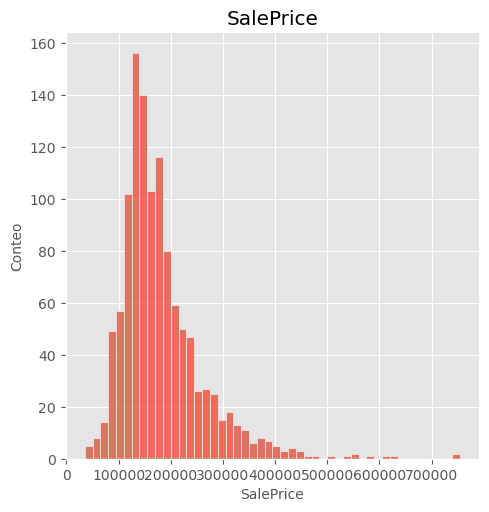

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


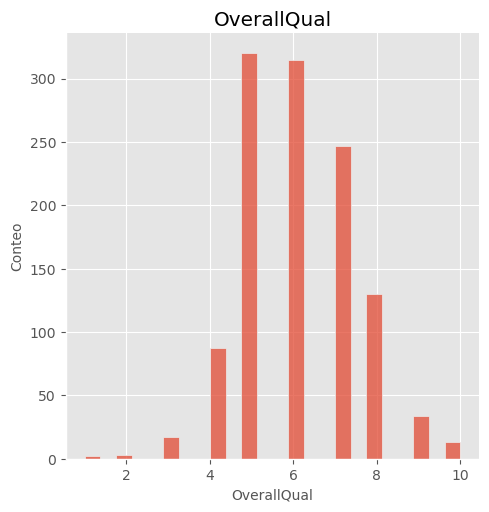

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


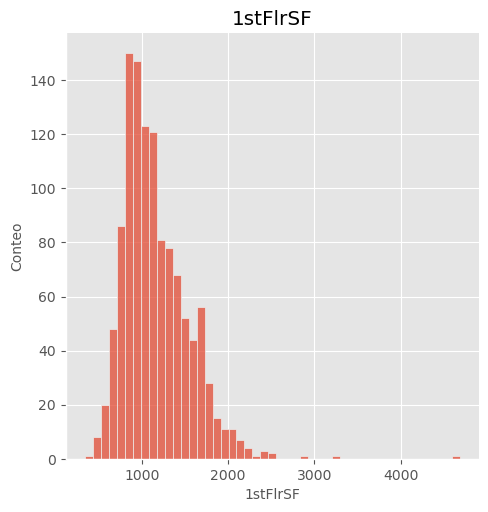

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


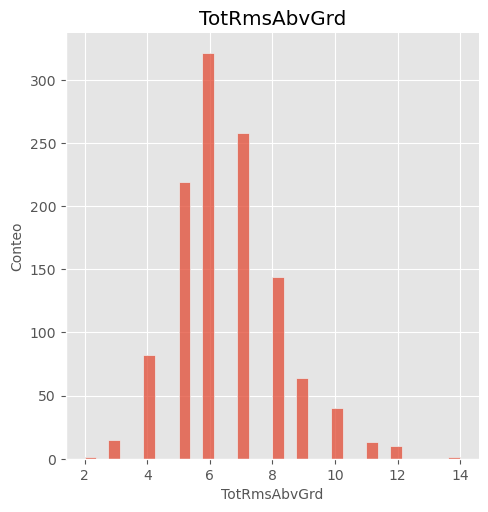

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


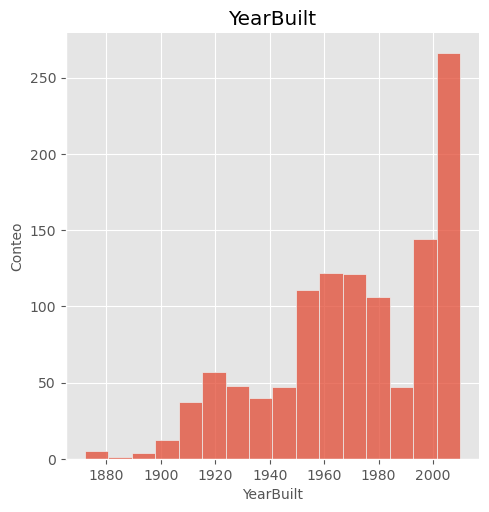

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


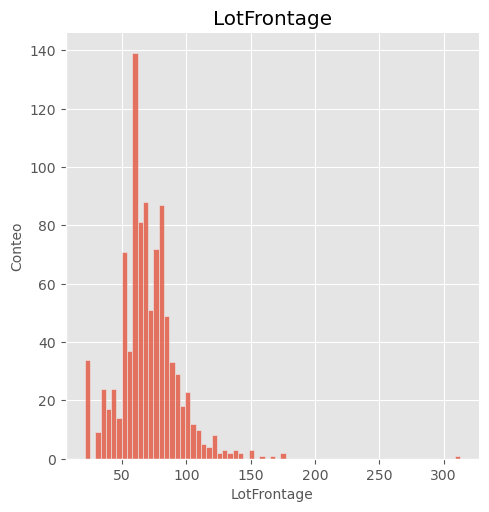

In [32]:
for i in data.columns.to_list():
    hist_dimensions(train, i)